# 빅데이터 06 

##  2개 변수 간의 관계

- 독립변수가 종속변수에 영향을 주었는가?

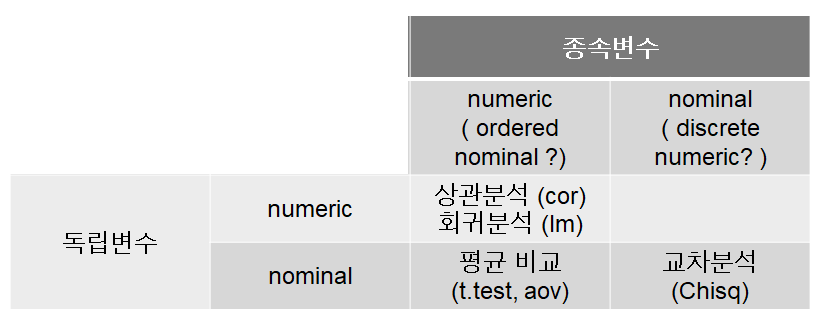



# nominal - nominal : 교차분석
 - 성별에 따라 생존자 숫자 (비율)이 다른가?
 - contigency table (cross table)  : 두 개의 변수의 도수를 표시
 - pd.crosstab ( 변수1, 변수2, normalize=True or False)  : normalize = 비율
 - 교차 분석이라고 부름

In [2]:
import seaborn as sns
import pandas as pd

titanic= sns.load_dataset('titanic')
pd.crosstab(titanic.sex, titanic.survived)

OSError: [WinError 193] %1은(는) 올바른 Win32 응용 프로그램이 아닙니다

In [ ]:
pd.crosstab(titanic.sex, titanic.survived, normalize=True)

## 시각화 
- bar차트 : crosstab객체.plot.bar () 


In [ ]:
ct=pd.crosstab(titanic.sex, titanic.survived)
ct.plot.bar(stacked=True)   # seaborn lib
  

- pie chart

In [ ]:
ct=pd.crosstab(titanic.survived, titanic.sex )
ct.plot.pie(subplots=True)

## 통계적 유의성
- 통계적 유의성 (= 모집단에서도 그럴 것인가 = 지금 샘플의 결과에서의 차이가 통계적으로 유의미한 차이인가)
- chi2_contingency(crosstab) 
- pvalue < 0.05 이면 (남녀 생존율이) 통계적으로 유의미한 차이가 있다. 


In [ ]:
from scipy import stats
stats.chi2_contingency(ct) # 2번째 값이 p value

- 해석 : 남녀 생존율이 통계적으로 유의한 차이가 있다

## 과제1 : class별 생존자수를 비교하고 (시각화포함), 통계적으로 유의한 차이인지 분석하시오


----

# nominal-numeric : 평균 비교
- nominal data value group  (독립변수) 에 따라 numeric value (종속변수) 의 mean이 다른가?
- 독립변수 -> 종속변수 
- df.groupby (독립변수).종속변수.mean()

In [ ]:
# 값이 2 종인 독립변수
titanic.groupby('sex').fare.mean()

In [ ]:
# 값이 3종 이상인 독립변수
titanic.groupby('class').fare.mean()

In [ ]:
# mean 외에도 가능 
titanic.groupby('class').fare.median()

## 시각화 
- sns.boxplot (x=독립변수, y=종속변수, data= df ) 


In [ ]:
import seaborn as sns

sns.boxplot(x='sex', y='fare', data=titanic)

- 다른 변수 추가 : hue 옵션  sns.boxplot (x=독립변수, y=종속변수, hue=추가 변수, data= df ) 
- 3개 이상 group이나 마찬가지

In [ ]:
sns.boxplot(x='sex', y='fare', hue='class', data=titanic)

## 통계적 유의성

- 독립변수 값의 종류가 2가지 일 때 (t-test) 와 3 이상일 (anova) 때가 다름 
- T-test도 2종류가 있음
    - 독립적 2 sample 비교 : 서로 다른 group의 값을 비교하는 경우 (예: 남 vs.여)  
    - paired 2 sample 비교 : 같은 대상의 서로 다른 값을 비교하는 경우 (예: 약먹기전의 수치 vs. 약먹은 후의 수치)
    
- 독립적 2 sample 비교 
    - 우선, 분산 비교(F-test: 등분산성, 분산이 차이가 있는지 없는지 )를 해야 함 
    - levene ( sample1, sample2) : p-value < 0.05 이면, 통계적 유의성이 있게 분산의 차이가 있음 
    - ttest_ind ( sample1, sample2, equal_var=True of False)   

In [ ]:
from scipy.stats import levene, ttest_ind

male= titanic[titanic.sex=="male"]
female= titanic[titanic.sex=="female"]
levene(male.fare,female.fare)

In [ ]:
ttest_ind(male.fare,female.fare, equal_var=False)

- 해석 : 성별에 따른 요금의 차이가 통계적 유의성이 있다. (=통계적으로 유의미한 수준의 차이가 있다)

- paired 2 sample :  ttest_rel ( 벡터1, 벡터2)  
- 벡터1, 2의 길이가 같아야.. 
- NA 가 없어야


## 3 가지 이상의 값을 갖는 독립변수의 경우
- one-way anova : 독립변수가 1개일 때

In [ ]:
titanic.groupby('pclass').fare.mean()

In [ ]:
sns.boxplot(x='pclass', y='fare', data=titanic)

- m=ols ('종속변수~독립변수', df).fit ()  : 모델 생성
- anova_lm (m) : 모델에 대한 정보 조회
- 데이터분석에서 모델이란 : 간단히 데이터 또는 데이터 간의 관계를 설명하는 도구

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model=ols('fare~pclass', titanic).fit()
print (anova_lm(model))

- 해석 : class 별 차이가 통계적 유의성이 있는 수준이다.


## 과제2 : 출발도시에 따라 탑승객 연령의 차이가 있는지 분석하시오. 시각화 포함

---

## numeric-numeric (상관분석)
- 상관관계 : 같이 증가, 같이 감소 (선형적 상관관계)
- 독립변수 -> 종속 변수 같은 순서가 없음
- 데이터를 봐서는 상관관계를 알기 어려움, 시각화 필요

In [ ]:
import matplotlib.pyplot as plt

#나이와 요금
plt.scatter("age", "fare", data=titanic)

- 시각화로도 충분치 않아서, 수치화된 계수가 필요
- 상관계수  -1 ~ 1

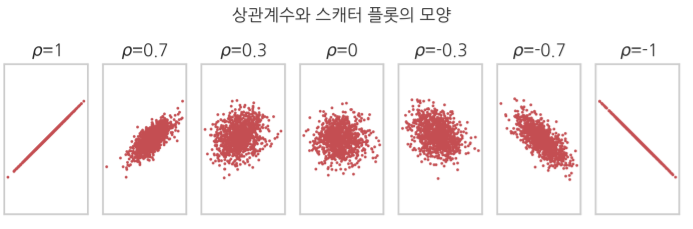

- 상관계수구하기: df.corr() <= 방향성이 없음

In [ ]:
# 변수 간 상관계수 구하기 
titanic[['age','fare']].corr()

In [ ]:
# 모든 numeric변수에 대해 (int 인 nominal포함)
titanic.corr() 

- 상관분석 : 상관도가 높은 변수 pair를 찾아내기 
- 위의 table 도 눈에 안들어오니 시각화 필요
- sns.pairplot(df, hue=키변수)

In [ ]:
sns.pairplot(titanic, hue='survived')

- discrete vs. continous 과 nominal vs. numeric 에 대해 다시 생각
- 상관계수의 강도 보기 : heatmap()

In [ ]:
sns.heatmap( titanic.corr()  )

## 스피어만 상관계수
- 기본은 pearson : 선형관계 (값의 크기 자체가 의미가 있는 numeric : 곱하기 나누기가 의미를 갖는 숫자)
    - 순서만, +/- , *//  3가지로 나눠짐
- spearman: 값의 크기 대신 순위로 계산 (순서가 있는 nominal 데이터)

In [ ]:
import numpy as np

x=np.arange(0,10)
y1=x

plt.scatter(x,y1)

In [ ]:
stats.pearsonr(x,y1)

In [ ]:
y2=x*x*x
plt.scatter(x,y2)

In [ ]:
stats.pearsonr(x,y2)

In [ ]:
stats.spearmanr(x,y2)

## 상관 분석 시 주의점

- 상관계수의 해석이 주관적임(다음 같은 기준이 있긴 하나..)
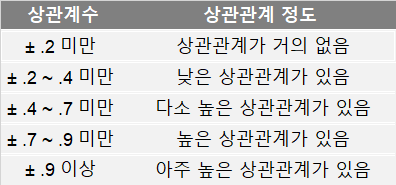

- 특히,개별 관측치에 속한 2변수 (예, 키-몸무게) 가 아닌, 상이한 2개의 통계 데이터( 연도 별 키의 통계, 연도 별 몸무게의 통계) 의 상관관계는 큰 의미가 없다 

- 30개 이상의 관측치(레코드)가 있어야 의미가 있다

## 과제3 : red wine 데이터("winequaility-red.csv")에서 quality 변수와 가장 상관관계가 높은 변수를 찾으시오. 시각화, 과정 포함

---

## numeric-numeric (회귀분석)
- 상관관계 : 2 변수가 같이 증가, 같이 감소 (선형적 상관관계, 직선에 얼마나 몰려있는지)
- 회귀분석 : 독립변수 -> 종속변수 선형적 상관관계의 정도(기울기)까지 분석

In [ ]:
y2=10*x
plt.scatter(x,y2)

In [ ]:
stats.pearsonr(x,y2)

## (잠깐 데이터 가공) wine 데이터 읽어오기 
- , 대신 다른 seperator를 쓰는 데이터 : read_csv ( sep="구분자")


In [ ]:
# red wine 읽어오기
red_df= pd.read_csv("winequality-red.csv", sep=";")
red_df.head()

- dataframe에 column 과 값 추가 : df.insert( 위치, column=이름, value=값 )

In [ ]:

red_df.insert(0, column='type', value='red')
red_df.head()

In [ ]:
# white wine 읽어 오기, column 추가 및 합치기 
white_df= pd.read_csv("winequality-white.csv", sep=";")
white_df.insert(0, column='type', value='white')
wine=pd.concat([red_df, white_df])

- wine data 탐색 

In [ ]:
wine.info()

In [ ]:
wine.describe()

## 회귀 분석 (regression)
- 단순 선형회귀 : 하나의 독립변수 -> 하나의 종속변수
- 모델 생성 : 모델=ols( '종속변수~독립변수', data=데이터).fit() 
- 모델 정보 조회 : 모델.summary()

In [ ]:
from scipy import stats
from statsmodels.formula.api import ols, glm 

m1 = ols ( 'quality~alcohol', data=wine).fit()
m1.summary()

- coef : 선형 모델 (1차함수 직선)의 기울기
- intercept: 절편
- y(종속변수)= coef*x(독립변수) + intercept
- 시각화 plot_ccpr ( 모델, 독립변수)

In [ ]:
# 모델의 시각화

sns.regplot(x="alcohol", y="quality", data=wine)


- 모델이란 ? 데이터를 설명하는 단순한 툴 (여기서는 1차함수의 절편, 기울기 => linear model) 

- 중선형회귀 : 독립변수가 여러개 일때  
- 모델 생성 : 모델=ols( '종속변수~독립변수1+독립변수2+ ... ', data=데이터).fit()
- 심장병 발병 확률
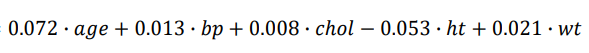

In [ ]:
#공백있는 column 이름 처리 
wine.columns = [c.replace(' ', '_') for c in wine.columns]


m2 = ols ( 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar', data=wine).fit()
m2.summary()

- 각 독립변수의 영향이 출력됨 
- p < 0.05 작은 경우만 유의성을 가짐 
- 시각화 : plot_partregress_grid (모델)

In [ ]:
#시각화 
fig=sm.graphics.plot_partregress_grid(m2)
fig.tight_layout(pad=1)
